In [1]:
# !pip install lxml

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_rows = 500
plt.rcParams['font.size'] = '16'
sns.set_style('whitegrid')

In [3]:
link = pd.read_html('https://genshin-impact.fandom.com/wiki/Wishes/History')
df = link[1]
df = df.dropna()

In [4]:
df.Featured = df.Featured.str.split().apply(lambda x: x[0])
df = df.drop('Wish', axis=1)

In [5]:
df = df[df.Featured != '—']

In [6]:
df.head()

,Featured,Duration
0,Venti,"September 28, 2020 – October 18, 2020"
4,Klee,"October 20, 2020 – November 10, 2020"
6,Tartaglia,"November 11, 2020 – December 1, 2020"
8,Zhongli,"December 1, 2020 – December 22, 2020"
10,Albedo,"December 23, 2020 – January 12, 2021"


In [8]:
paired_df = (df.groupby('Duration').Featured.count() == 2).reset_index()
paired_df = paired_df.rename(
    columns={
        'Featured': 'Paired'
    }
)
paired_df.Paired = paired_df.Paired.astype(int)

df = pd.merge(df, paired_df, left_on='Duration' \
         , right_on='Duration', how='inner')

In [9]:
df.head()

,Featured,Duration,Paired
0,Venti,"September 28, 2020 – October 18, 2020",0
1,Klee,"October 20, 2020 – November 10, 2020",0
2,Tartaglia,"November 11, 2020 – December 1, 2020",0
3,Zhongli,"December 1, 2020 – December 22, 2020",0
4,Albedo,"December 23, 2020 – January 12, 2021",0


In [10]:
df.Duration = df.Duration.apply(lambda x: x.split('–')[0])
df['Date'] = pd.to_datetime(df.Duration, infer_datetime_format=True)
df = df.drop('Duration', axis=1)

In [11]:
df.isna().any()

Featured    False
Paired      False
Date        False
dtype: bool

In [12]:
df = df.rename(
    columns={
        'Featured': 'Character'
    }
)

In [13]:
df.columns

Index(['Character', 'Paired', 'Date'], dtype='object')

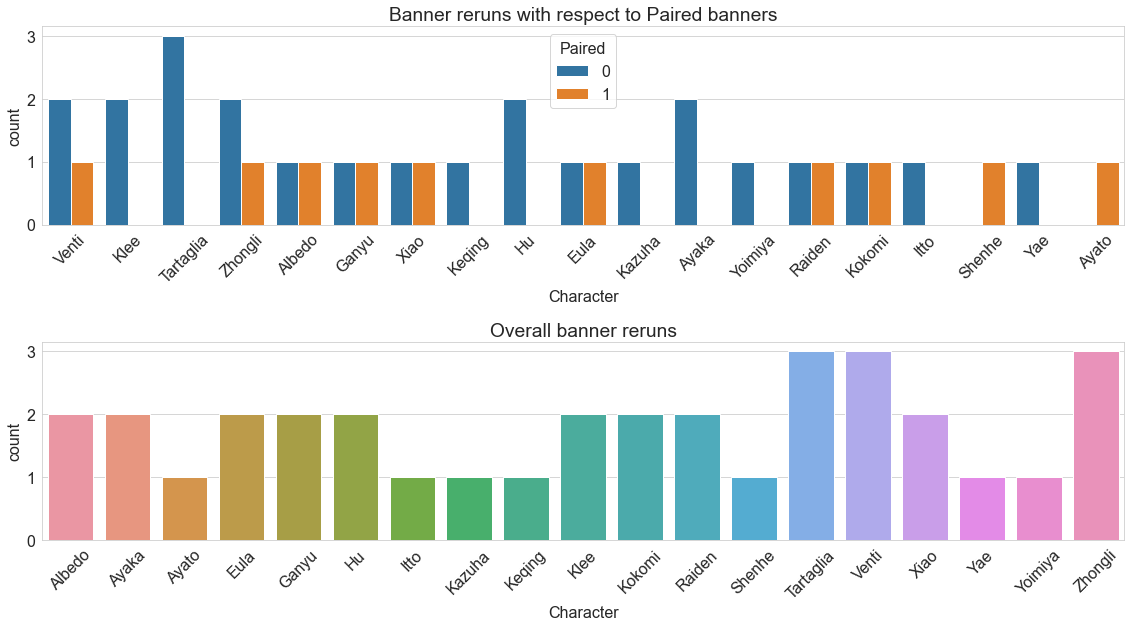

In [14]:
banner_counts = df.groupby('Character').Date.count()

fig = plt.figure(figsize=(16, 9))

ax1 = fig.add_subplot(2, 1, 1)
sns.countplot(x=df.Character, hue=df.Paired)
plt.title('Banner reruns with respect to Paired banners')
plt.xticks(rotation=45)



ax2 = fig.add_subplot(2, 1, 2)
sns.barplot(x=banner_counts.index, y=banner_counts)
plt.title('Overall banner reruns')
plt.xticks(rotation=45)
plt.ylabel('count')


plt.tight_layout()

In [15]:
tables_2 = pd.read_html('https://www.bulletinsun.com/2022/01/'
                        'Genshin-Impact-pick-rates-Full-list-of-each-Genshin-Impact-character.html')

In [16]:
pick_rate_df = tables_2[0]
pick_rate_df = pick_rate_df.loc[1:]
pick_rate_df.columns = ['Rank', 'Character', 'Element', 'Popularity']

pick_rate_df = pick_rate_df.drop(['Rank'], axis=1)
pick_rate_df.Character = pick_rate_df.Character.apply(lambda x: x.split()[0])

In [17]:
df = pd.merge(df, pick_rate_df)

In [18]:
df.isna().any()

Character     False
Paired        False
Date          False
Element       False
Popularity    False
dtype: bool

In [19]:
df.head()

,Character,Paired,Date,Element,Popularity
0,Venti,0,2020-09-28,Anemo,83%
1,Venti,0,2021-03-17,Anemo,83%
2,Venti,1,2022-03-30,Anemo,83%
3,Klee,0,2020-10-20,Pyro,16.3%
4,Klee,0,2021-06-09,Pyro,16.3%


In [20]:
df.Popularity = df.Popularity.apply(lambda x: float(x[:-1]))

In [21]:
banner_counts = df.groupby('Character').Date.count().reset_index()

banner_counts = banner_counts.rename(
    columns={
        'Date': 'Appearances'
    }
)

df = pd.merge(df, banner_counts)

In [22]:
unique_df = df.drop_duplicates('Character')

In [23]:
unique_df.head()

,Character,Paired,Date,Element,Popularity,Appearances
0,Venti,0,2020-09-28,Anemo,83.0,3
3,Klee,0,2020-10-20,Pyro,16.3,2
5,Zhongli,0,2020-12-01,Geo,91.5,3
8,Albedo,0,2020-12-23,Geo,74.2,2
10,Ganyu,0,2021-01-12,Cryo,76.2,2


<AxesSubplot:>

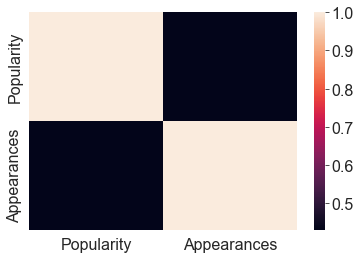

In [24]:
sns.heatmap(unique_df[['Popularity', 'Appearances']].corr())

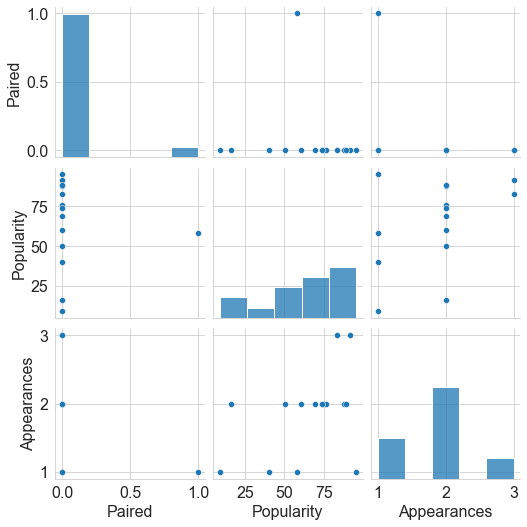

In [25]:
sns.pairplot(unique_df)

In [27]:
unique_df.sort_values(by=['Popularity', 'Appearances'], ascending=False)

,Character,Paired,Date,Element,Popularity,Appearances
19,Kazuha,0,2021-06-29,Anemo,95.2,1
5,Zhongli,0,2020-12-01,Geo,91.5,3
23,Raiden,0,2021-09-01,Electro,88.7,2
20,Ayaka,0,2021-07-21,Cryo,87.8,2
0,Venti,0,2020-09-28,Anemo,83.0,3
10,Ganyu,0,2021-01-12,Cryo,76.2,2
8,Albedo,0,2020-12-23,Geo,74.2,2
15,Hu,0,2021-03-02,Pyro,73.8,2
25,Kokomi,0,2021-09-21,Hydro,69.2,2
17,Eula,0,2021-05-18,Cryo,60.2,2
